#Chipotle data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [12]:
chipo=pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")

In [13]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [14]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [15]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [16]:
top_5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)[0:5]

<Axes: ylabel='Frequency'>

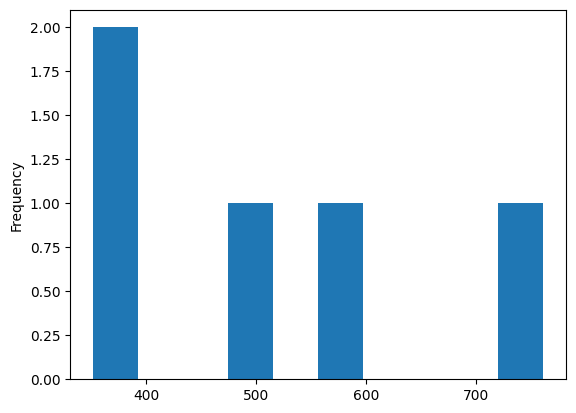

In [17]:
top_5.plot(kind='hist')

<Axes: xlabel='item_name'>

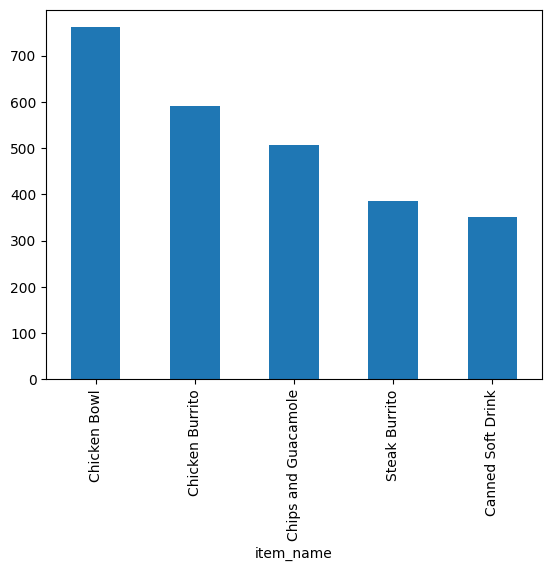

In [18]:
top_5.plot(kind='bar')

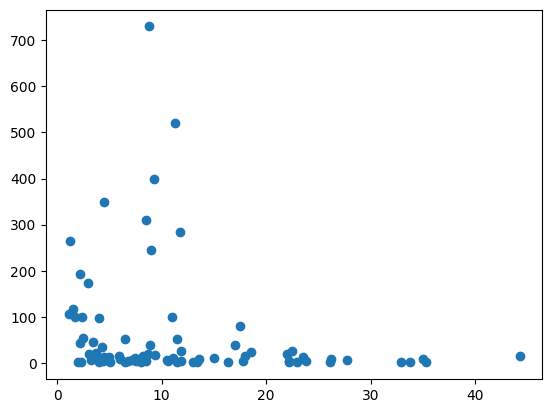

In [19]:
fig, ax = plt.subplots()
price_cnt = chipo.groupby('item_price').quantity.sum()
ax.scatter(price_cnt.index.tolist(), price_cnt.tolist())

<ipython-input-20-353cafec846b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders = chipo.groupby('order_id').sum()


(0.0, 36.7)

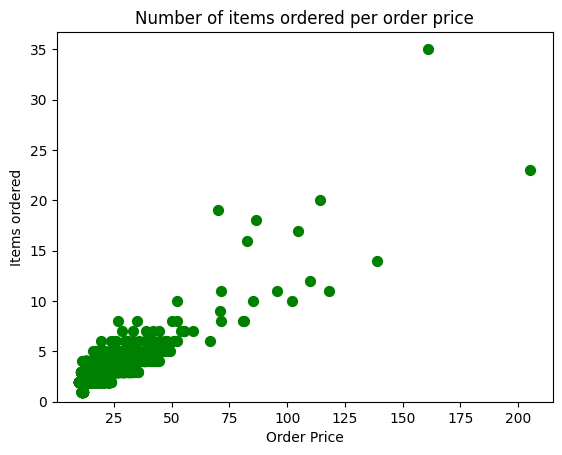

In [20]:
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

#Online Retails Purchase

In [21]:
online_rt=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv", encoding='latin-1')

In [22]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [23]:
online_rt.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [24]:
online_rt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


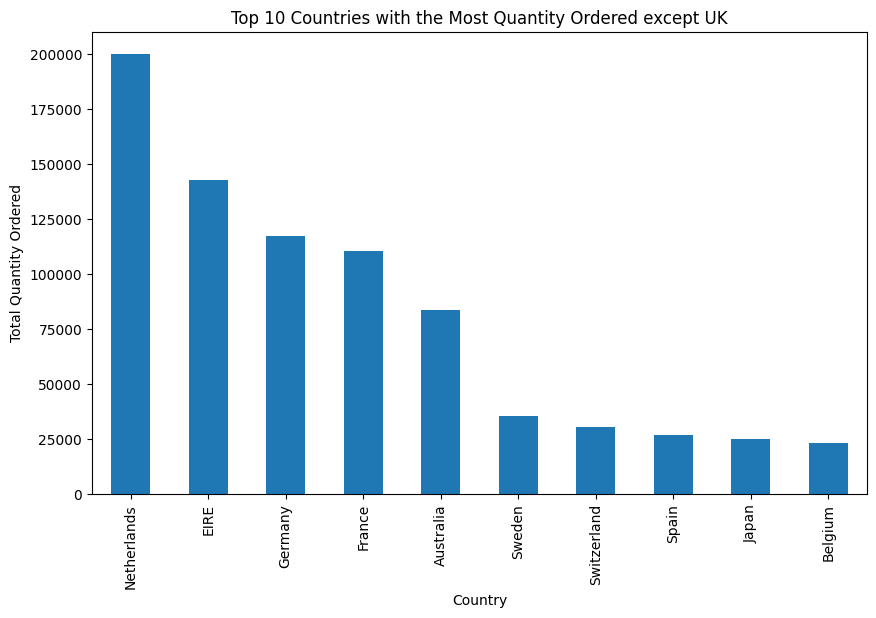

In [25]:
online_rt_without_uk = online_rt[online_rt['Country'] != 'United Kingdom']
country_quantity = online_rt_without_uk.groupby('Country')['Quantity'].sum()
countries_10 = country_quantity.nlargest(10)

plt.figure(figsize = (10,6))
countries_10.plot(kind='bar')
plt.title('Top 10 Countries with the Most Quantity Ordered except UK')

plt.xlabel('Country')

plt.ylabel('Total Quantity Ordered')
plt.show()

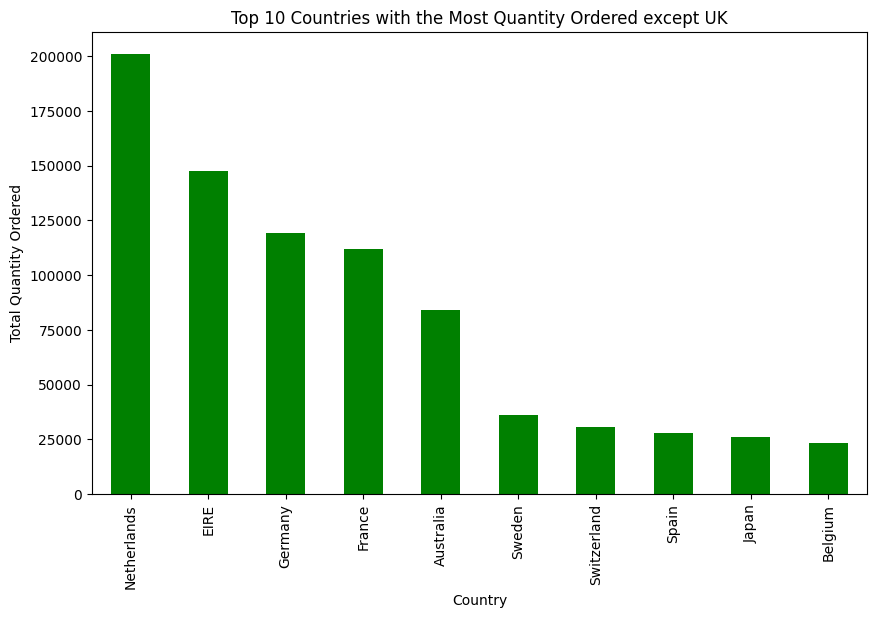

In [26]:
online_rt = online_rt[online_rt['Quantity'] > 0] #Exclude negative Quantity entries
online_rt_without_uk = online_rt[online_rt['Country'] != 'United Kingdom']
country_quantity = online_rt_without_uk.groupby('Country')['Quantity'].sum()
countries_10 = country_quantity.nlargest(10)

plt.figure(figsize = (10,6))
countries_10.plot(kind='bar' , color = 'green')
plt.title('Top 10 Countries with the Most Quantity Ordered except UK')

plt.xlabel('Country')

plt.ylabel('Total Quantity Ordered')
plt.show()

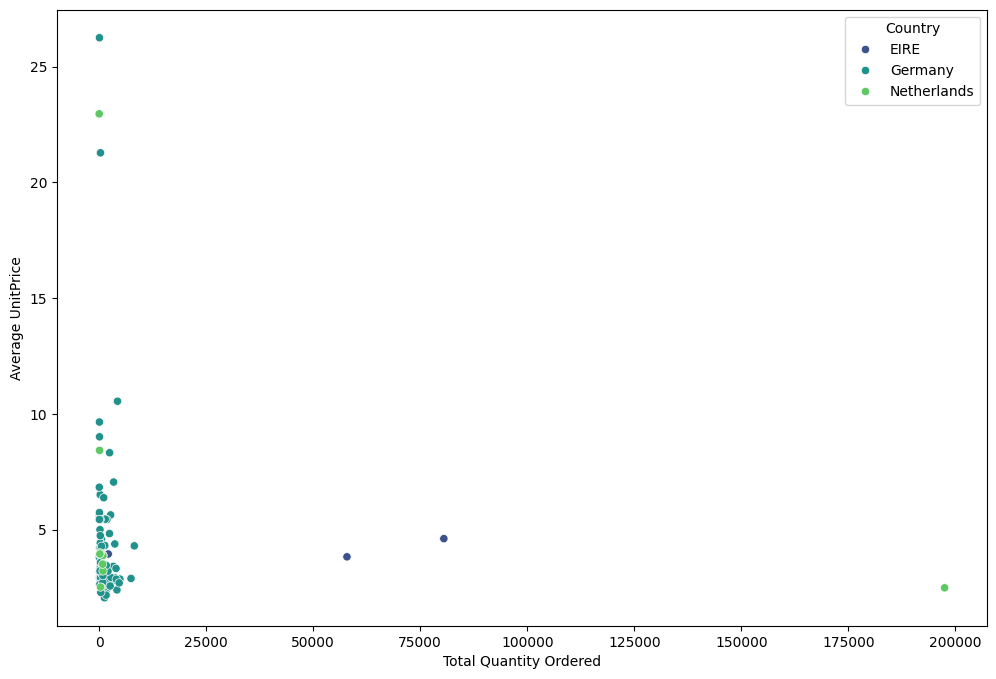

In [27]:
customer_data = online_rt_without_uk.groupby(['Country','CustomerID']).agg({
    'Quantity':'sum',
    'UnitPrice':'mean'
}).reset_index()

top_3_countries = customer_data.groupby('Country')['Quantity'].sum().nlargest(3).index
top_3_customer_data = customer_data[customer_data['Country'].isin(top_3_countries)]

plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Quantity',
    y='UnitPrice',
    hue='Country',
    data=top_3_customer_data,
    palette='viridis'
)
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Average UnitPrice')

plt.show()

In [28]:
customer_data.head()


,Country,CustomerID,Quantity,UnitPrice
0,Australia,12386.0,354,2.391000
1,Australia,12388.0,1462,2.777700
2,Australia,12393.0,816,2.279688
3,Australia,12415.0,77670,2.928883
4,Australia,12422.0,195,2.434286


In [29]:
customer_data['UnitPrice'].dtype


dtype('float64')

In [30]:
specific_customer_id = [12346.0, 12347.0]
selected_customer_data = online_rt[online_rt['CustomerID'].isin(specific_customer_id)]
selected_customer_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


In [31]:
quantity_by_country = online_rt.groupby('Country')['Quantity'].sum()
countries_by_quantity = quantity_by_country.nlargest(3)
countries_by_quantity

Country
United Kingdom    4733819
Netherlands        200937
EIRE               147447
Name: Quantity, dtype: int64

In [32]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt.head()

<ipython-input-32-ea3cba4f76b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [33]:
avg_price = online_rt.groupby(['CustomerID', 'Country'])['UnitPrice'].mean().reset_index()
avg_price.head(10)

,CustomerID,Country,UnitPrice
0,12346.0,United Kingdom,1.040000
1,12347.0,Iceland,2.644011
2,12348.0,Finland,5.764839
3,12349.0,Italy,8.289041
4,12350.0,Norway,3.841176
5,12352.0,Norway,15.930706
6,12353.0,Bahrain,6.075000
7,12354.0,Spain,4.503793
8,12355.0,Bahrain,4.203846
9,12356.0,Portugal,3.201186


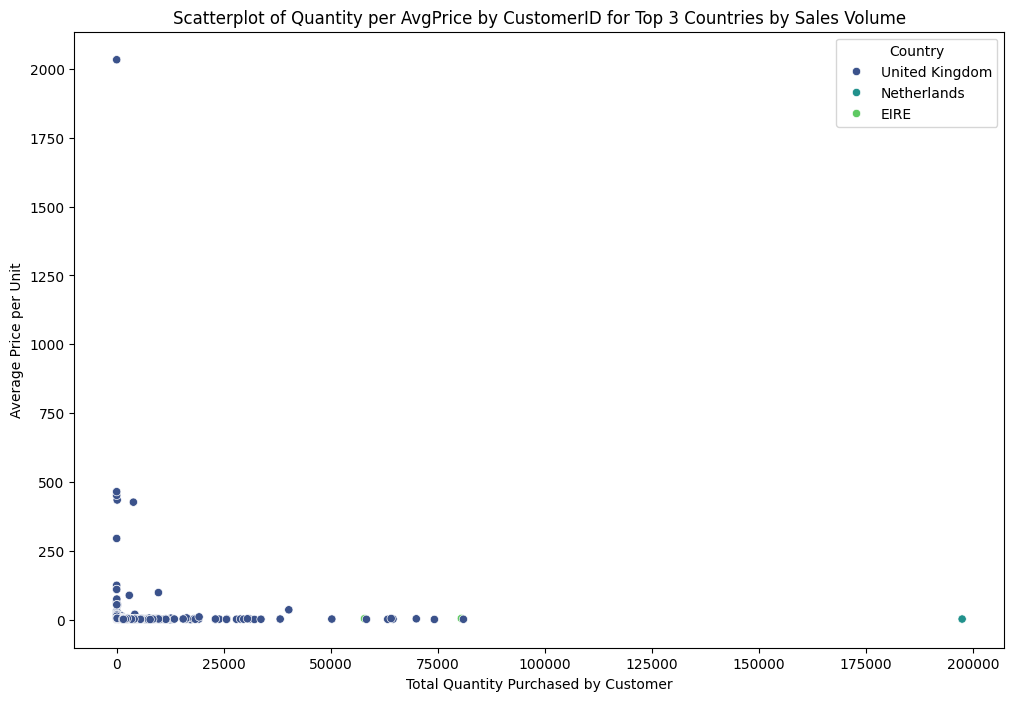

In [34]:
top_3_countries_by_quantity = quantity_by_country.nlargest(3).index

selected_data = online_rt[online_rt['Country'].isin(top_3_countries_by_quantity)]

avg_price_per_unit = selected_data.groupby(['CustomerID', 'Country'])['UnitPrice'].mean().reset_index()

total_quantity_per_customer = selected_data.groupby('CustomerID')['Quantity'].sum().reset_index()

merged_data = pd.merge(avg_price_per_unit, total_quantity_per_customer, on='CustomerID', how='inner', suffixes=('_avg', '_total'))


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Country', data=merged_data, palette='viridis')
plt.title('Scatterplot of Quantity per AvgPrice by CustomerID for Top 3 Countries by Sales Volume')
plt.xlabel('Total Quantity Purchased by Customer')
plt.ylabel('Average Price per Unit')

plt.show()

<ipython-input-35-6d4fc4c7c4ae>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Quantity', y='UnitPrice', data=merged_data, palette='viridis')


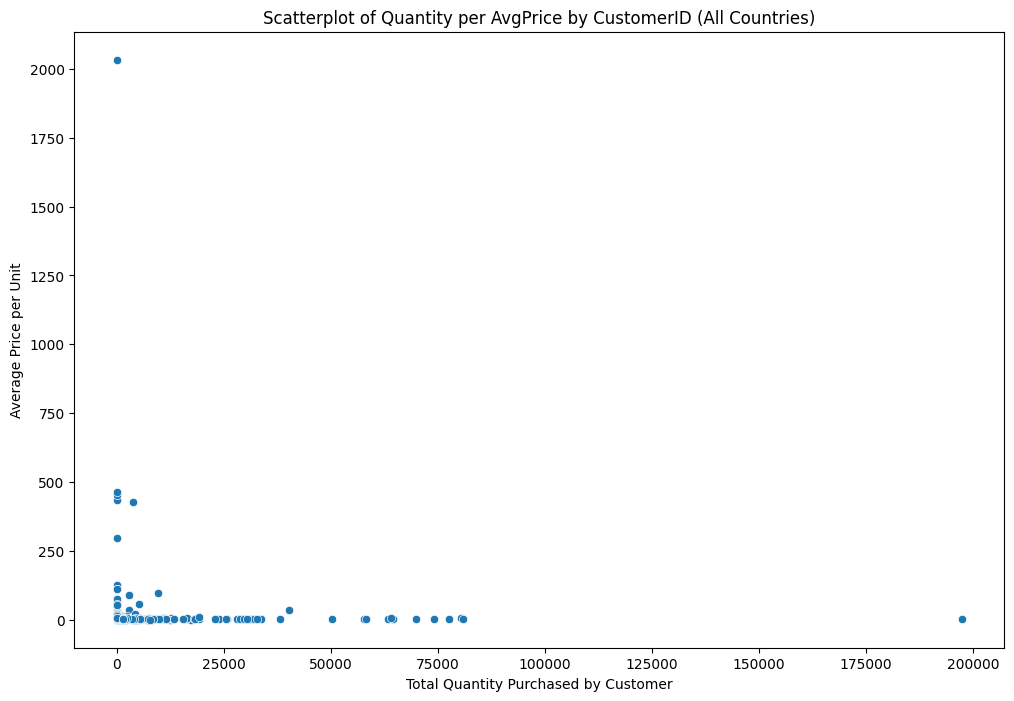

In [35]:
avg_price_per_unit = online_rt.groupby('CustomerID')['UnitPrice'].mean().reset_index()
total_quantity = online_rt.groupby('CustomerID')['Quantity'].sum().reset_index()

merged_data = pd.merge(avg_price_per_unit, total_quantity, on='CustomerID', how='inner', suffixes=('_avg', '_total'))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity', y='UnitPrice', data=merged_data, palette='viridis')
plt.title('Scatterplot of Quantity per AvgPrice by CustomerID (All Countries)')
plt.xlabel('Total Quantity Purchased by Customer')
plt.ylabel('Average Price per Unit')
plt.show()

<ipython-input-36-c54566849d25>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Quantity', y='UnitPrice', data=merged_data, palette='viridis')


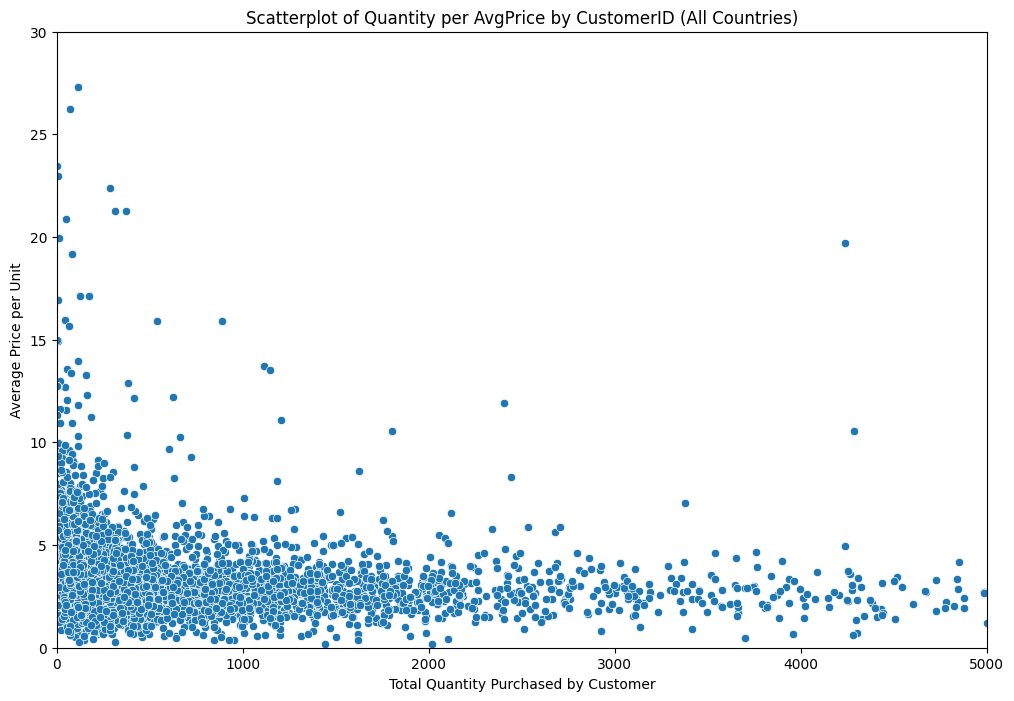

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Quantity', y='UnitPrice', data=merged_data, palette='viridis')
plt.title('Scatterplot of Quantity per AvgPrice by CustomerID (All Countries)')
plt.xlabel('Total Quantity Purchased by Customer')
plt.ylabel('Average Price per Unit')

plt.xlim(0, 5000)
plt.ylim(0, 30)

plt.show()

In [37]:
price_intervals = pd.cut(online_rt['UnitPrice'], bins=range(0, 51))

revenue_per_price_interval = online_rt.groupby(price_intervals).agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'UnitPrice': 'mean'
})

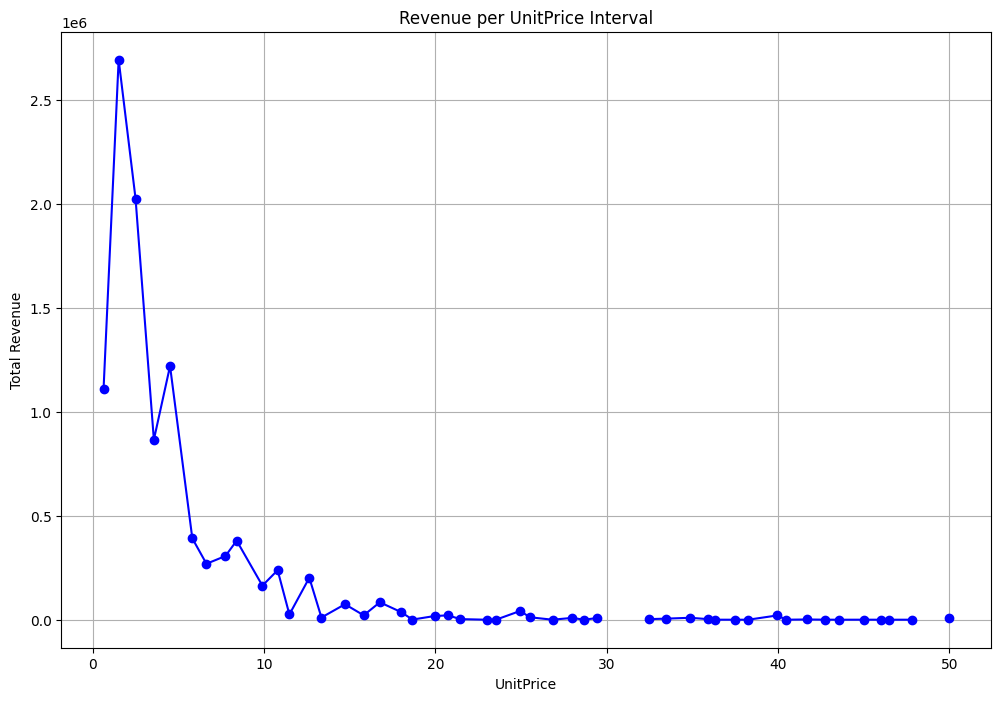

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(revenue_per_price_interval['UnitPrice'], revenue_per_price_interval['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Revenue per UnitPrice Interval')
plt.xlabel('UnitPrice')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

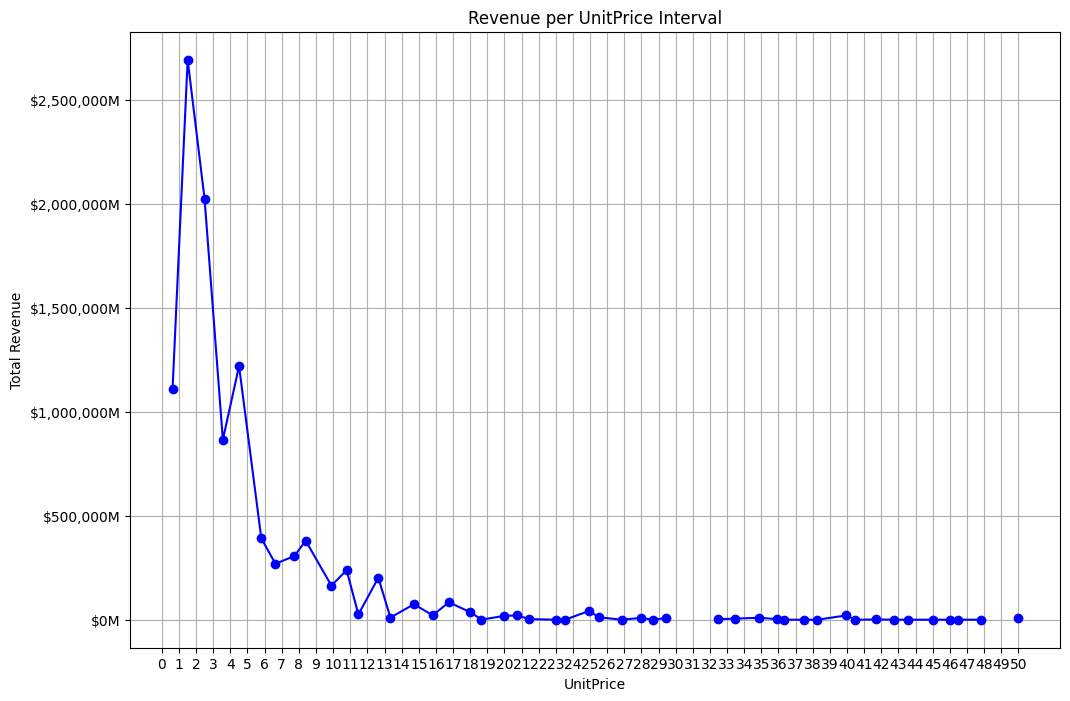

In [39]:
import matplotlib.ticker as ticker
plt.figure(figsize=(12, 8))
plt.plot(revenue_per_price_interval['UnitPrice'], revenue_per_price_interval['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Revenue per UnitPrice Interval')
plt.xlabel('UnitPrice')
plt.ylabel('Total Revenue')

plt.xticks(range(0, 51))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

plt.grid(True)
plt.show()

#Scores

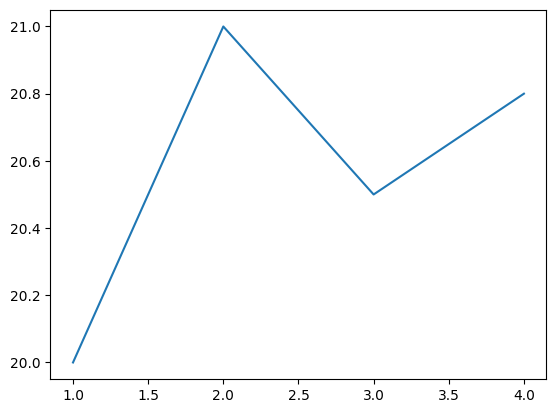

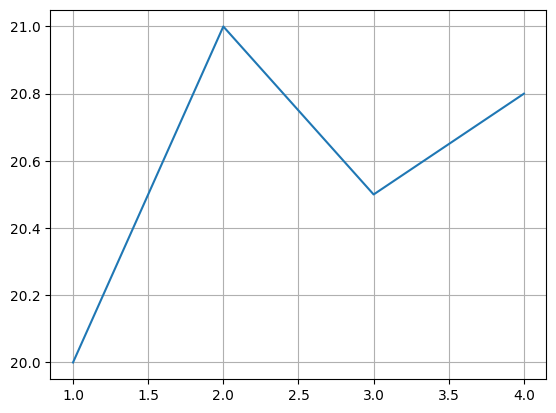

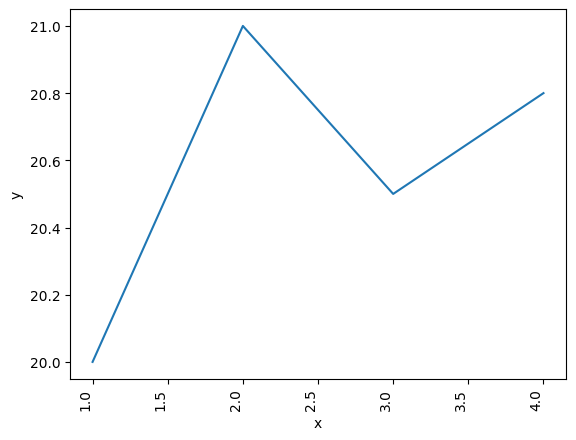

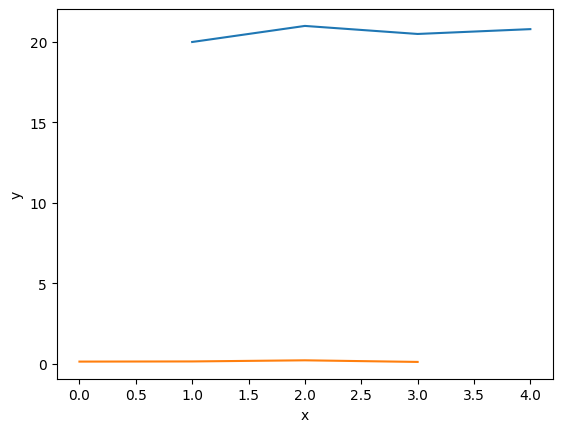

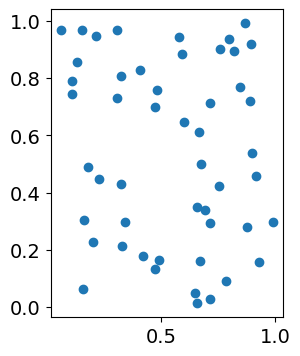

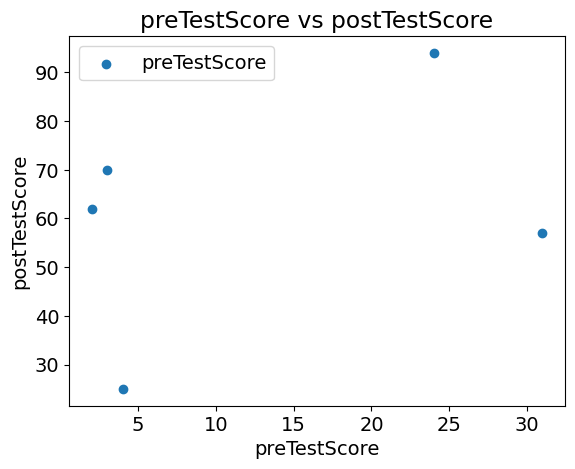

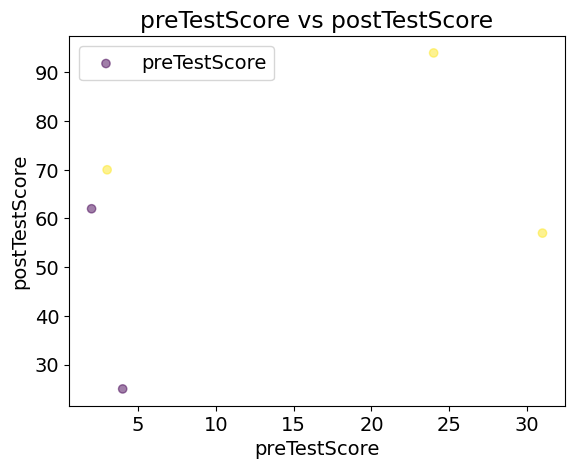

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X = [1, 2, 3, 4]
Y = [20, 21, 20.5, 20.8]


plt.plot(X, Y)
plt.show()

plt.plot(X, Y)
plt.grid()
plt.show()
plt.setp(plt.gca().get_xticklabels(), rotation=90,
         horizontalalignment='right')  # Rotate Axis Labels

plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


y_error = [0.12, 0.13, 0.2, 0.1]

plt.plot(X, Y, y_error)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(3, 4))

plt.rcParams.update({'font.size': 14})

x = np.random.random(50)
y = np.random.random(50)

plt.scatter(x, y)
plt.show()
df = pd.DataFrame({
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
    'female': [0, 1, 1, 0, 1],
    'age': [42, 52, 36, 24, 73],
    'preTestScore': [4, 24, 31, 2, 3],
    'postTestScore': [25, 94, 57, 62, 70]
})

plt.scatter(df["preTestScore"], df["postTestScore"])
plt.xlabel("preTestScore")
plt.ylabel("postTestScore")
plt.title("preTestScore vs postTestScore")
plt.legend(["preTestScore", "postTestScore"])
plt.show()

df = pd.DataFrame({
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
    'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
    'female': [0, 1, 1, 0, 1],
    'age': [42, 52, 36, 24, 73],
    'preTestScore': [4, 24, 31, 2, 3],
    'postTestScore': [25, 94, 57, 62, 70]
})

x = df["preTestScore"]
y = df["postTestScore"]
colors = df["female"]

plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel("preTestScore")
plt.ylabel("postTestScore")
plt.title("preTestScore vs postTestScore")
plt.legend(["preTestScore", "postTestScore"])
plt.show()

#Tips


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [42]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

In [43]:
tips.drop(['Unnamed: 0'], axis=1, inplace=True)


<Axes: xlabel='total_bill', ylabel='Count'>

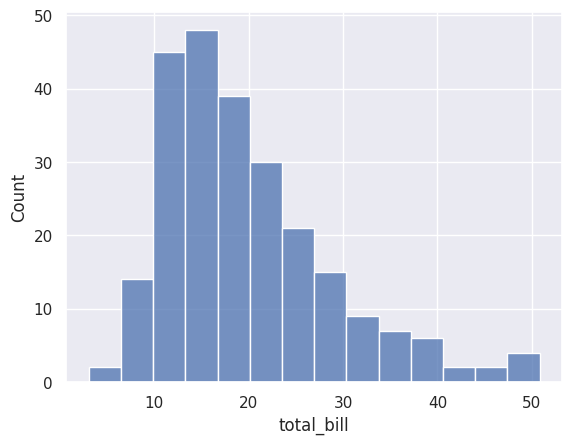

In [44]:
sns.histplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='tip'>

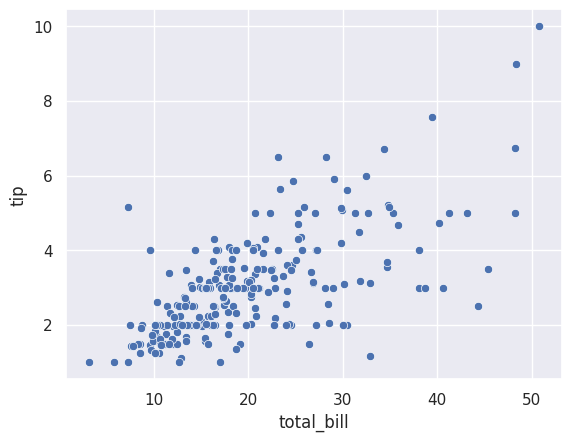

In [45]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])


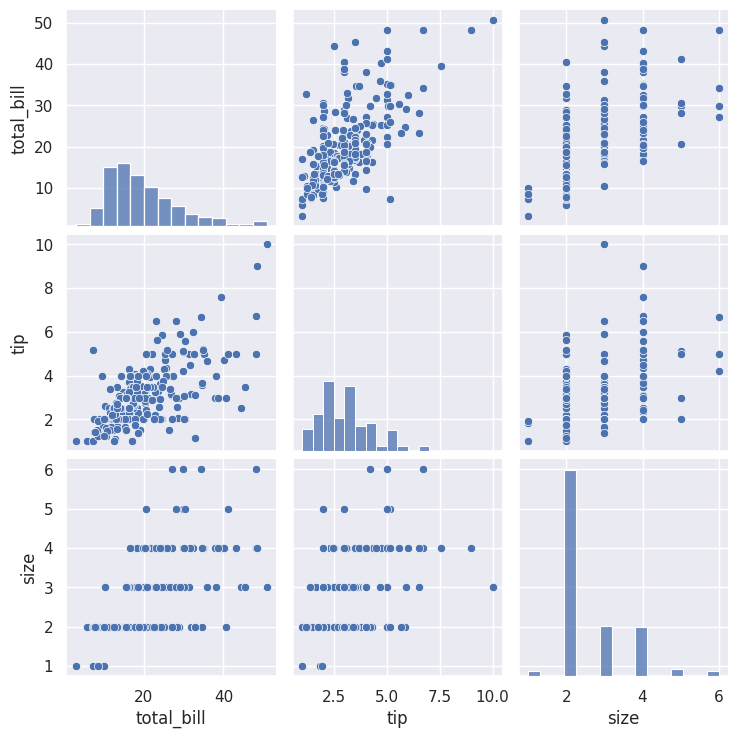

In [46]:
sns.pairplot(tips)


<Axes: xlabel='day', ylabel='total_bill'>

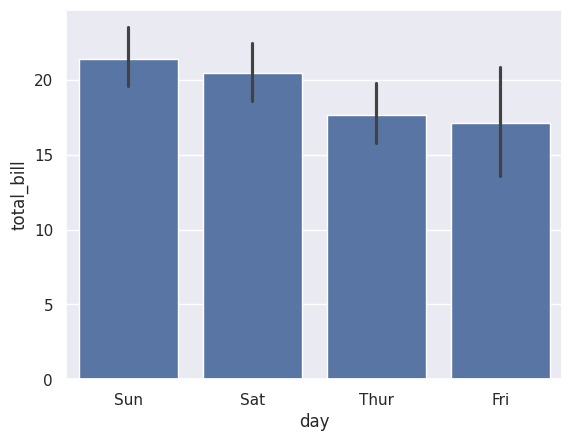

In [47]:
sns.barplot(x=tips['day'], y=tips['total_bill'])


<Axes: xlabel='tip', ylabel='day'>

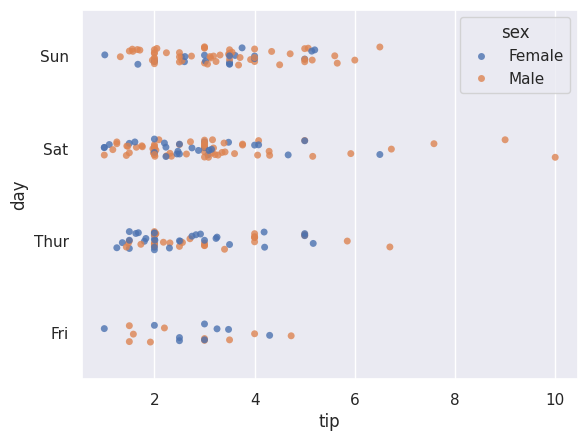

In [48]:
sns.stripplot(x=tips['tip'], y=tips['day'], hue=tips['sex'], alpha=0.8)


<Axes: xlabel='tip', ylabel='day'>

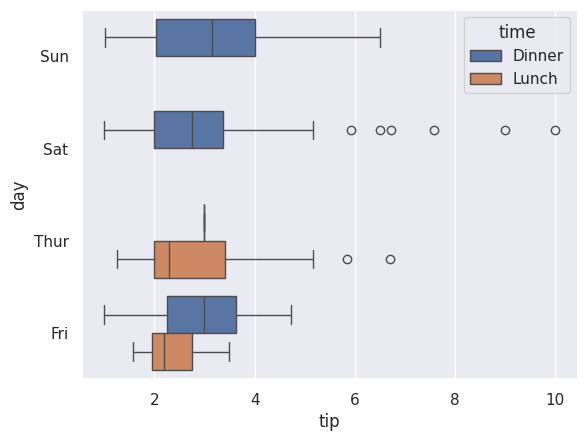

In [49]:
sns.boxplot(x=tips['tip'], y=tips['day'], hue=tips['time'])


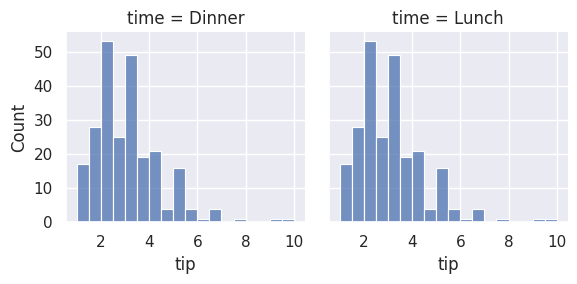

In [50]:
sns.FacetGrid(tips, col='time').map(sns.histplot, x=tips['tip'])


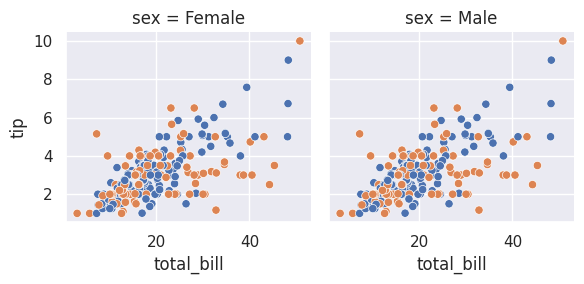

In [51]:
sns.FacetGrid(tips, col='sex').map(sns.scatterplot, x=tips['total_bill'], y=tips['tip'], hue=tips['smoker'])


#VISUALIZING THE TITANIC DISASTER

In [52]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

titanic = pd.read_csv(url)


titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
titanic.to_csv('titanic.csv', index=False)


In [54]:
titanic.set_index('PassengerId').head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


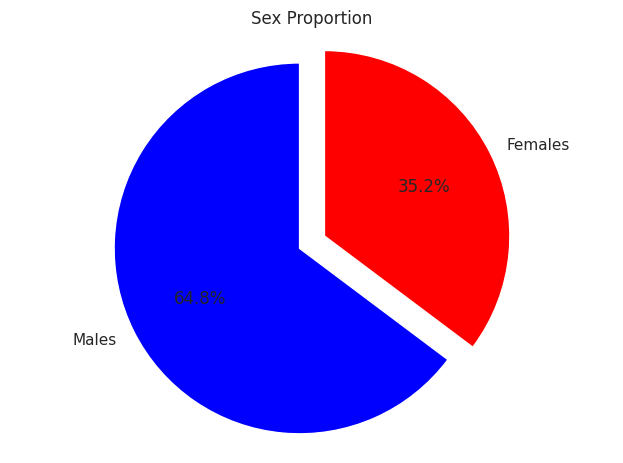

In [55]:
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,

    # with the labels being officer names
    labels = ['Males', 'Females'],

    # with no shadows
    shadow = False,

    # with colors
    colors = ['blue','red'],

    # with one slide exploded out
    explode = (0.15 , 0),

    # with the start angle at 90%
    startangle = 90,

    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()


(-5.0, 85.0)

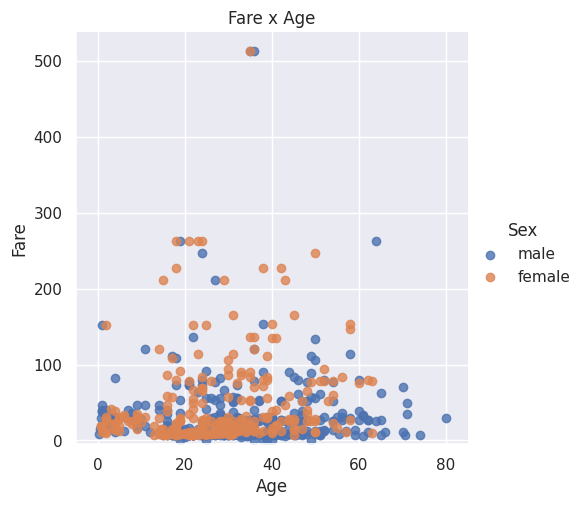

In [56]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [57]:
titanic.Survived.sum()


342

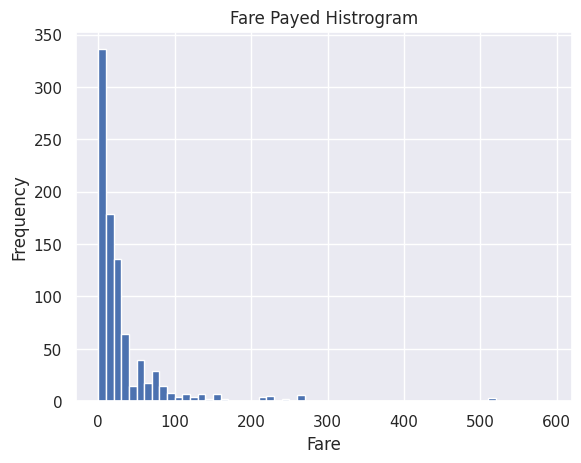

In [58]:
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

#POKEMON


In [59]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']
            }


In [60]:
pokemon = pd.Series(raw_data)
pokemon

name         [Bulbasaur, Charmander, Squirtle, Caterpie]
evolution      [Ivysaur, Charmeleon, Wartortle, Metapod]
type                           [grass, fire, water, bug]
hp                                      [45, 39, 44, 45]
pokedex                               [yes, no, yes, no]
dtype: object

In [61]:
pokemon1 = pd.DataFrame.from_dict(raw_data)
pokemon1 = pokemon1[["name", "type", "hp", "evolution", "pokedex"]]
pokemon1

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [62]:
place = ["Hills","Volcano","Lakes","park"]
pokemon1["Place"] = place
pokemon1

,name,type,hp,evolution,pokedex,Place
0,Bulbasaur,grass,45,Ivysaur,yes,Hills
1,Charmander,fire,39,Charmeleon,no,Volcano
2,Squirtle,water,44,Wartortle,yes,Lakes
3,Caterpie,bug,45,Metapod,no,park


In [63]:
pokemon1.dtypes


name         object
type         object
hp            int64
evolution    object
pokedex      object
Place        object
dtype: object

#Apple stock

In [64]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [65]:
apple.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [66]:
apple.Date = pd.to_datetime(apple.Date)



In [67]:
apple.set_index("Date")


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [68]:

x = apple[apple.duplicated("Date")]
if len(x) != 0:
    print("Yes there are duplicates in date column")
else:
    print("No there are no duplicates in date column")

No there are no duplicates in date column


In [69]:
apple = apple.sort_values(by="Date",ascending=True).reset_index(drop=True)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
8460,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
8461,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
8462,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
8463,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


In [70]:
apple["month"] = pd.DatetimeIndex(apple.Date).month
apple["Date_wo"] = pd.DatetimeIndex(apple.Date).day
apple.groupby(by="month")[["Date_wo"]].max().reset_index()

,month,Date_wo
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


In [71]:
differnce = apple.Date.max() - apple.Date.min()
str(differnce)

'12261 days 00:00:00'

In [72]:
months_data = apple["month"].count()
months_data

8465

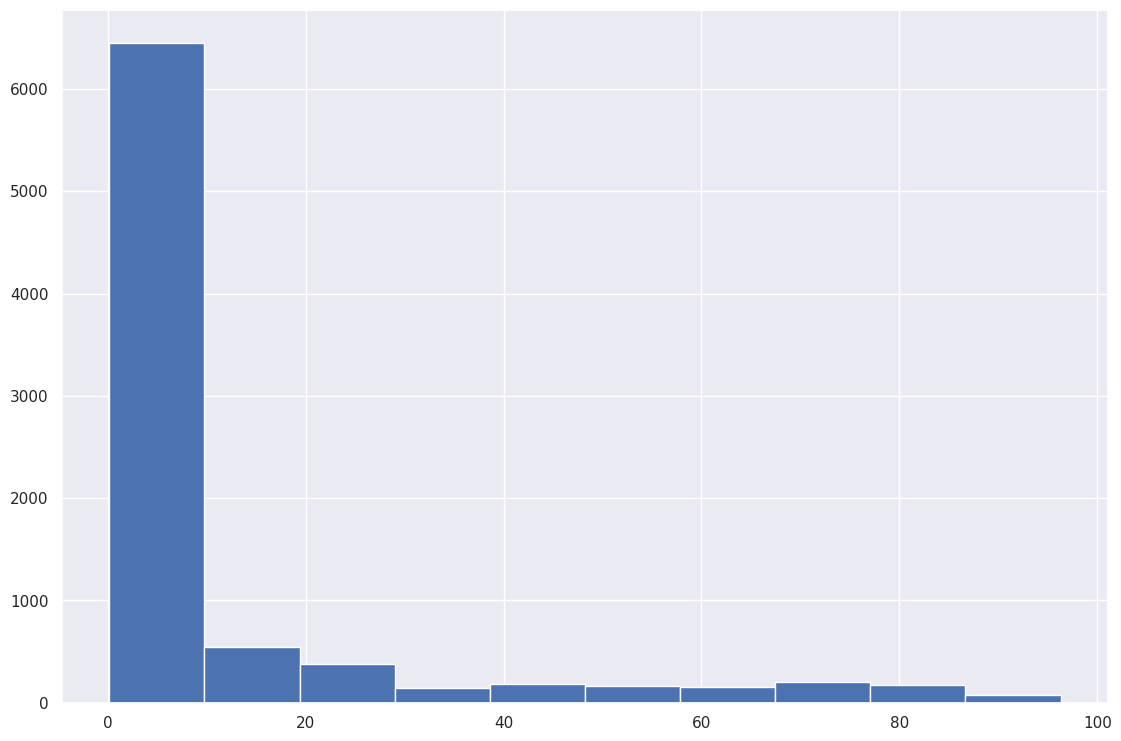

In [73]:
plt.figure(figsize=(13.5, 9))
plt.hist(apple["Adj Close"])
plt.show()

#INVESTOR FUNDS US

In [74]:
import pandas as pd

In [75]:
url = 'https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv'
df = pd.read_csv(url)
df.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
1,2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2,2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
3,2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
4,2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [76]:
df.value_counts()

Date        Total Equity  Domestic Equity  World Equity  Hybrid  Total Bond  Taxable Bond  Municipal Bond  Total 
2012-12-05  -7426         -6060            -1367         -74      5317        4210          1107           -2183     1
2012-12-12  -8783         -7520            -1263          123     1818        1598          219            -6842     1
2014-08-20   2671          738              1933          821     4999        4185          814             8490     1
2014-08-27  -577          -2199             1623          943     3655        2921          734             4021     1
2014-09-03  -4024         -5305             1281          544     2430        1768          661            -1050     1
2014-09-10   1257         -1291             2548          1055    1554        711           843             3866     1
2014-11-05  -32           -1634             1602         -176     5813        5284          529             5604     1
2014-11-12   1464          61               1403     

In [77]:
df = df.set_index('Date')
df.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-05,-7426,-6060,-1367,-74,5317,4210,1107,-2183
2012-12-12,-8783,-7520,-1263,123,1818,1598,219,-6842
2012-12-19,-5496,-5470,-26,-73,103,3472,-3369,-5466
2012-12-26,-4451,-4076,-375,550,2610,3333,-722,-1291
2013-01-02,-11156,-9622,-1533,-158,2383,2103,280,-8931


In [78]:
df.index
# it is a 'object' type

Index(['2012-12-05', '2012-12-12', '2012-12-19', '2012-12-26', '2013-01-02',
       '2013-01-09', '2014-04-02', '2014-04-09', '2014-04-16', '2014-04-23',
       '2014-04-30', '2014-05-07', '2014-05-14', '2014-05-21', '2014-05-28',
       '2014-06-04', '2014-06-11', '2014-06-18', '2014-06-25', '2014-07-02',
       '2014-07-09', '2014-07-30', '2014-08-06', '2014-08-13', '2014-08-20',
       '2014-08-27', '2014-09-03', '2014-09-10', '2014-11-05', '2014-11-12',
       '2014-11-19', '2014-11-25', '2015-01-07', '2015-01-14', '2015-01-21',
       '2015-01-28', '2015-02-04', '2015-02-11', '2015-03-04', '2015-03-11',
       '2015-03-18', '2015-03-25', '2015-04-01', '2015-04-08'],
      dtype='object', name='Date')

In [79]:
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [80]:
monthly = df.resample('M').sum()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0
2013-05-31,0,0,0,0,0,0,0,0
2013-06-30,0,0,0,0,0,0,0,0
2013-07-31,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0


In [81]:
monthly = monthly.dropna()
monthly

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-12-31,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-31,3661,-1627,5288,2730,12149,9414,2735,18540
2013-02-28,0,0,0,0,0,0,0,0
2013-03-31,0,0,0,0,0,0,0,0
2013-04-30,0,0,0,0,0,0,0,0
2013-05-31,0,0,0,0,0,0,0,0
2013-06-30,0,0,0,0,0,0,0,0
2013-07-31,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0


In [82]:
year = monthly.resample('AS-JAN').sum()
year

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2012-01-01,-26156,-23126,-3031,526,9848,12613,-2765,-15782
2013-01-01,3661,-1627,5288,2730,12149,9414,2735,18540
2014-01-01,330,-44689,45021,19570,59890,44994,14896,79787
2015-01-01,15049,-10459,25508,7280,26028,17986,8041,48357


#IRIS

In [83]:
import pandas as pd
import numpy as np

In [84]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)

iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [85]:

iris.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [86]:
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [87]:
iris.iloc[10:30,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [88]:
iris.petal_length.fillna(1, inplace = True)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [90]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [91]:
iris.iloc[0:3 ,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [92]:
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
5,4.6,3.4,1.4,0.3
6,5.0,3.4,1.5,0.2
7,4.4,2.9,1.4,0.2


In [93]:
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.4,0.2
1,5.4,3.9,1.7,0.4
2,4.6,3.4,1.4,0.3
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2


#Wine

In [94]:
import pandas as pd
import numpy as np

In [95]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url)

wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [96]:
wine = wine.drop(wine.columns[[0,3,6,8,11,12,13]], axis = 1)

wine.head()

,14.23,1.71,15.6,127,3.06,2.29,5.64
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [97]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.20,1.78,11.2,100,2.76,1.28,4.38
1,13.16,2.36,18.6,101,3.24,2.81,5.68
2,14.37,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [98]:
wine.iloc[0:3, 0] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100,2.76,1.28,4.38
1,NaN,2.36,18.6,101,3.24,2.81,5.68
2,NaN,1.95,16.8,113,3.49,2.18,7.80
3,13.24,2.59,21.0,118,2.69,1.82,4.32
4,14.20,1.76,15.2,112,3.39,1.97,6.75


In [99]:
wine.iloc[2:4, 3] = np.nan
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,NaN,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,NaN,3.49,2.18,7.80
3,13.24,2.59,21.0,NaN,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


In [100]:
wine.alcohol.fillna(10, inplace = True)

wine.magnesium.fillna(100, inplace = True)

wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,10.00,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,14.20,1.76,15.2,112.0,3.39,1.97,6.75


In [101]:
wine.isnull().sum()


alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [102]:
random = np.random.randint(10, size = 10)
random

array([4, 5, 7, 8, 7, 9, 2, 5, 0, 4])

In [103]:
wine.alcohol[random] = np.nan
wine.head(10)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.78,11.2,100.0,2.76,1.28,4.38
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
2,NaN,1.95,16.8,100.0,3.49,2.18,7.80
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
4,NaN,1.76,15.2,112.0,3.39,1.97,6.75
5,NaN,1.87,14.6,96.0,2.52,1.98,5.25
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
7,NaN,1.64,14.0,97.0,2.98,1.98,5.20
8,NaN,1.35,16.0,98.0,3.15,1.85,7.22
9,NaN,2.16,18.0,105.0,3.32,2.38,5.75


In [104]:
wine.isnull().sum()

alcohol              7
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

In [105]:
wine = wine.dropna(axis = 0, how = "any")
wine.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
1,10.00,2.36,18.6,101.0,3.24,2.81,5.68
3,13.24,2.59,21.0,100.0,2.69,1.82,4.32
6,14.06,2.15,17.6,121.0,2.51,1.25,5.05
10,14.12,1.48,16.8,95.0,2.43,1.57,5.00
11,13.75,1.73,16.0,89.0,2.76,1.81,5.60


In [106]:
mask = wine.alcohol.notnull()
mask

wine.alcohol[mask]

1      10.00
3      13.24
6      14.06
10     14.12
11     13.75
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 170, dtype: float64